Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Landyn Francis"
COLLABORATORS = ""

: 

---

# Perceptron

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/500px-Perceptron_example.svg.png)

## Positive definite matrices

$\newcommand{\bfx}{\mathbf{x}}$
A matrix $A$ is said to be

1. Positive definite, denoted by $A \succ 0$, if $\bfx^\top A \bfx > 0$ for all $\bfx \ne 0$.
2. Positive semi-definite, denoted by $A \succeq 0$, if $\bfx^\top A \bfx \ge 0$ for all $\bfx \ne 0$.
3. Negative definite, denoted by $A \prec 0$, if $\bfx^\top A \bfx < 0$ for all $\bfx \ne 0$.
4. Negative semi-definite, denoted by $A \preceq 0$, if $\bfx^\top A \bfx \le 0$ for all $\bfx \ne 0$.
5. Indefinite, in all other cases.


## Hessian

$\newcommand{\calH}{\mathcal{H}}$
$\newcommand{\p}{\partial}$
$\newcommand{\ppfxx}[2]{\frac{\p^2 f}{\p x_{#1}\p x_{#2}}}$
$\newcommand{\ppfx}[1]{\frac{\p^2 f}{\p x_{#1}^2}}$
$$ \calH_{\bfx} f(\bfx) = \nabla^2 f(\bfx) 
= \begin{bmatrix}
\ppfx{1} & \dots & \ppfxx{1}{n}\\
\vdots & \ddots & \vdots\\
\ppfxx{n}{1} & \dots & \ppfx{n}
\end{bmatrix} $$

## Curvatures

From left to right: Positive definite $\calH f \succ 0$, Negative definite $\calH f \prec 0$, Indefinite.
![image.png](attachment:image.png)

## Level Set or Contours

A level-set of a function $f(\bfx)$ at $c$ is the curve (in 2D)  or surface (in 3D or more) where the function $f(\bfx) = c$.

$$ S(f, c) = \{\bfx : f(\bfx) = c\} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def plot_contour(func):
    x, y = np.mgrid[-3:3:21j,
                    -3:3:21j]
    bfx = np.array([x, y])
    f = func(x,y)
    
    fig, ax = plt.subplots()
    ctr = ax.contour(x, y, f, 20, cmap='Blues_r')
    ax.clabel(ctr, ctr.levels, inline=True, fontsize=6, fmt='f(x)=%.01f')
    ax.plot([0], [0], 'ro') 
    ax.text(0, 0, '$x^*$', color='r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.show()

ModuleNotFoundError: No module named 'matplotlib'

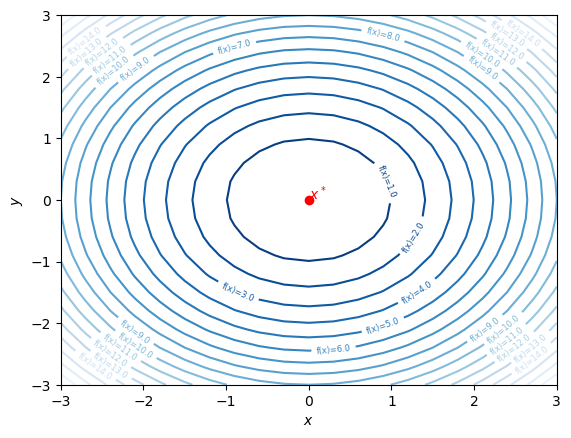

In [3]:
def f(x, y): return  x**2 + y**2
plot_contour(f)

## Gradient visualization

In [4]:
def plot_gradients(func, gradfunc):
    x, y = np.mgrid[-3:3:21j,
                    -3:3:21j]
    bfx = np.array([x, y])
    f = func(x,y)
    [dfdx, dfdy] = gradfunc(x,y)
    fig, ax = plt.subplots()
    ctr = ax.contour(x, y, f, 20, cmap='Blues_r')
    ax.quiver(x, y, dfdx, dfdy)
    ax.plot([0], [0], 'ro') 
    ax.text(0, 0, '$x^*$', color='r')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.show()
    

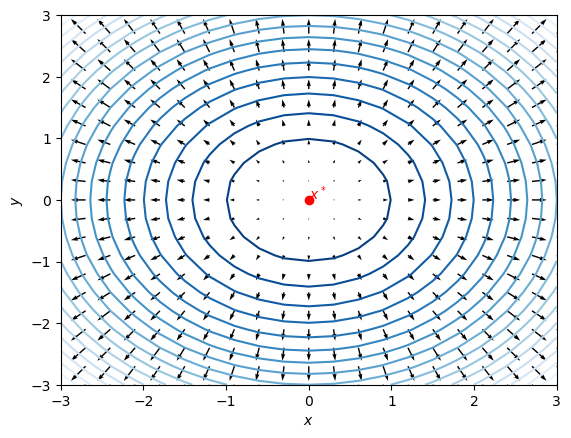

In [5]:
def f(x, y): return  x**2 + y**2
def gradf(x, y): return 2*x, 2*y
plot_gradients(f, gradf)

## Directional Derivative

$\newcommand{\bfd}{\mathbf{d}}$
The directional derivatiive is change of the function $f(\bfx)$ in the direction $\bfd$

$$ D_{\bfd} f(\bfx) = \lim_{h \to 0} \frac{f(\bfx + h \bfd) - f(\bfx)}{h}$$

The partial derivatives can be interpreted as the derivatives in the direction of axis:
$$ \frac{\p f(\bfx)}{\p x} = \lim_{h \to 0} \frac{f(\bfx + h \begin{bmatrix} 1 \\ 0\end{bmatrix} ) - f(\bfx)}{h}$$
$$ \frac{\p f(\bfx)}{\p y} = \lim_{h \to 0} \frac{f(\bfx + h \begin{bmatrix} 0 \\ 1\end{bmatrix} ) - f(\bfx)}{h}$$

## Gradient is perpendicular to contours or level-sets

Let the implicit form of the level set be:

$$ S(f, c) = \{\bfx : f(\bfx) = c\} $$


Let it's parameteric form the curve be:

$\newcommand{\bfg}{\mathbf{g}}$
$\newcommand{\bft}{\mathbf{t}}$
$\newcommand{\bbR}{\mathbf{R}}$
$$ S(f, c) = \{\bfg(c, \bft): \bft \in \bbR^{n-1}\} $$

For a constant $c$, we have $f(\bfg(c, \bft)) = c$. Differentiating it with respect to $\bft$, we get by chain rule.

$\newcommand{\calJ}{\mathcal{J}}$
$$ \nabla_\bfx f(\bfx)^\top \calJ_\bft \bfg(c, \bft) = \mathbf{0}^\top$$,
where $\calJ_\bft \bfg(c, \bft)$ is the Jacobian of $\bfg(c, \bft)$.

Dot product is zero when the two vectors are perpendicular. This means that the gradient is always perpendicular to the tangents to the surface $\calJ_\bft \bfg(c, \bft)$.

### Quadratic function example:

A quadratic function $f(\bfx) = x_1^2 + x_2^2$ has level sets as circles:
$$ S(f, c) = \{\bfx : x_1^2 + x_2^2 = c\} $$

It has the parameteric form as
$$ S(f, c) = \{\bfg(c, \theta) = \begin{bmatrix}\sqrt{c} \cos(\theta) \\ \sqrt{c} \sin(\theta)\end{bmatrix} : \theta \in [0, 2\pi)\} $$

The gradient is:
$$ \nabla_\bfx f(\bfx)^\top = 2\bfx^\top 
= 2 \begin{bmatrix} \sqrt{c} \cos(\theta) & \sqrt{c} \sin(\theta)\end{bmatrix}$$

and 

The derivative of curve with respect to $\theta$ the tangent to the curve:
$$\calJ_\theta \bfg(c, \theta) 
= \begin{bmatrix} \frac{\p }{\p \theta} \sqrt{c} \cos(\theta) \\ \frac{\p }{\p \theta} \sqrt{c} \sin(\theta)\end{bmatrix} 
= \begin{bmatrix}-\sqrt{c} \sin(\theta) \\ \sqrt{c} \cos(\theta)\end{bmatrix}$$

$$ \nabla_\bfx f(\bfx)^\top\calJ_\theta \bfg(c, \theta) 
= 2 \begin{bmatrix} \sqrt{c} \cos(\theta) & \sqrt{c} \sin(\theta)\end{bmatrix}
\begin{bmatrix}-\sqrt{c} \sin(\theta) \\ \sqrt{c} \cos(\theta)\end{bmatrix} = 0$$

## Minimizing general functions

We cannot minimize general functions by solving

$$ \frac{\p f(\bfx)}{\p \bfx} = \mathbf{0}^\top$$ 

because the equation might not have a formula for it.

Instead we use iterative methods like gradient descent minimize general function $f(\bfx)$.

## Gradient descent

1. Start from a random point $\bfx_0$, $\bfx_t \leftarrow \bfx_0$.
2. Move in the direction opposite to $\nabla_\bfx f(\bfx)$. If we were at $\bfx_t$, then the next point is at $\bfx_{t+1} = \bfx_t - \alpha_t \nabla_\bfx f(\bfx)$, where $\alpha_t > 0$ is a positive scalar, called the step size or the learning rate.
3. Stop when the gradient is almost zero $\|\nabla_\bfx f(\bfx)\| < 10^{-4}$.

This corresponds to the following algorithm:

$\bfx_t = \bfx_0$<br/>
while ($\|\nabla_\bfx f(\bfx)\| > 10^{-4}$) {
    $\bfx_t \leftarrow \bfx_t - \alpha_t \nabla_\bfx f(\bfx)$
}


## A bit more about the step size/learning rate

Recall the Taylor series expansion of a function $f(x)$ around $x_0$

$$f(x) = f(x_0) + \frac{d f(x)}{d x} (x - x_0) + \frac{1}{2!} \frac{d^2 f(x)}{d x^2} (x - x_0)^2 + \dots + \frac{1}{n!} \frac{d^n f(x)}{d x^n} (x - x_0)^n + \dots $$

Vectorized Taylor series expansion is

$$f(\bfx) = f(\bfx_0) + \nabla_\bfx^\top f(\bfx) (\bfx - \bfx_0) + \frac{1}{2!}  (\bfx - \bfx_0)^\top \calH f(\bfx) (\bfx - \bfx_0)^\top + \dots \infty$$

While optimizing around the point $\bfx_t$, we can use the Taylor series expansion to find a local quadratic approximation to find the next best minima:

$$\hat{f}(\bfx_{t+1}) = f(\bfx_t) + \nabla_\bfx^\top f(\bfx) (\bfx_{t+1} - \bfx_t) + \frac{1}{2!}  (\bfx_{t+1} - \bfx_t)^\top \calH f(\bfx) (\bfx_{t+1} - \bfx_t)^\top $$

At the optimal point of the quadratic approximation the derivative is zero:
$$\frac{\p \hat{f}(\bfx_{t+1})}{\p \bfx_{t+1}} = \mathbf{0}^\top$$
$$\nabla_\bfx^\top f(\bfx) + (\bfx_{t+1} - \bfx_t)^\top \calH  f(\bfx) = \mathbf{0}^\top$$

Taking transpose and rearranging the terms we get:
$$ \bfx_{t+1} - \bfx_t = -[\calH  f(\bfx)]^{-1}\nabla_\bfx f(\bfx) $$
$$ \bfx_{t+1} = \bfx_t -[\calH  f(\bfx)]^{-1}\nabla_\bfx f(\bfx) $$

This is the update rule for the Newton's method for optimization. Note that the step size here is inversely proportional the second derivative.

### Taylor series approximation

Approximate the following function to a quadratic function near the point $\bfx_0 = [-2, 3]$

$f (x) = 0.06\exp( 2x_1 +x_2) + 0.05\exp(x_1−2 x_2) + \exp(−x_1) $

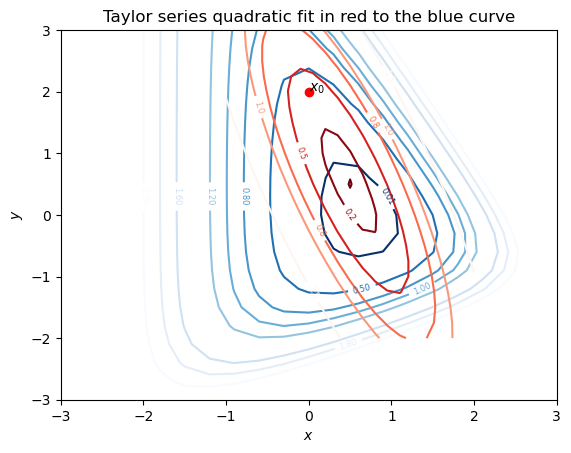

In [6]:
# Define the function
def f(x): 
    return (0.06 * np.exp(x @ [2, 1]) 
            + 0.05* np.exp(x @ [1, -2]) 
            + np.exp(x @ [-1, 0]))

# Compute its derivative, the gradient function
def grad_f(x):    
    coeff1 = np.array([2, 1])
    coeff2 = np.array([1, -2])
    coeff3 = np.array([-1, 0])
    # Slicing using np.newaxis or None, increases the dimension by 1.
    # https://numpy.org/doc/stable/reference/constants.html#numpy.newaxis
    return (0.06 * np.exp(x @ coeff1)[..., None] * coeff1
            + 0.05 * np.exp(x @ coeff2)[..., None] * coeff2
            + np.exp(x @ coeff3)[..., None] * coeff3)

def numerical_jacobian(f, x, h=1e-10):
    n = x.shape[-1]
    eye = np.eye(n)
    x_plus_dx = x + h * eye # n x n
    num_jac = (f(x_plus_dx) - f(x)) / h # limit definition of the formula # n x m
    if num_jac.ndim >= 2:
        num_jac = num_jac.swapaxes(-1, -2) # m x n
    return num_jac
    
# Compare our grad_f with numerical gradient
def check_numerical_jacobian(f, jac_f,  nD=2, **kwargs):
    x = np.random.rand(nD)
    num_jac = numerical_jacobian(f, x, **kwargs)
    return np.allclose(num_jac, jac_f(x), atol=1e-06, rtol=1e-4) # m x n

## Throw error if grad_f is wrong
assert check_numerical_jacobian(f, grad_f)

def hessian_f(x):
    coeff1 = np.array([2, 1])
    coeff2 = np.array([1, -2])
    coeff3 = np.array([-1, 0])
    return (0.06 * np.exp(x @ coeff1)[..., None, None] * np.outer(coeff1, coeff1)
            + 0.05 * np.exp(x @ coeff2)[..., None, None] * np.outer(coeff2, coeff2)
            +  np.exp(x @ coeff3)[..., None, None] * np.outer(coeff3, coeff3))

## Throw error if hessian_f is wrong
assert check_numerical_jacobian(grad_f, hessian_f)


def taylor_series_quad_approx(x0, func, grad_func, hessian_func):
    def quad_func(x):
        x_min_x0 = (x-x0)[..., None] # make column vectors
        x_min_x0_T = (x-x0)[..., None, :] # make row vectors
        grad_f_x0_T = grad_func(x0)[..., None, :] # make row vectors
        return (func(x0) 
                + grad_f_x0_T @ x_min_x0
                + x_min_x0_T @ hessian_func(x0) @ x_min_x0).squeeze(axis=(-1,-2))
            
    return quad_func

def plot_contours(func, ax=None, cmap='Blues_r', levels=20, 
                  xrange=slice(-3,3,21j),
                  yrange=slice(-3,3,21j)):
    x, y = np.mgrid[xrange,
                    yrange]
    bfx = np.concatenate([x[..., None],
                          y[..., None]], axis=-1)
    f = func(bfx)
    if ax is None:
        fig, ax = plt.subplots()
    ctr = ax.contour(x, y, np.log(f), levels, cmap=cmap)
    ax.clabel(ctr, ctr.levels, inline=True, fontsize=6)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    return ax
    
# Fit a quadratic curve around this curve:
ax = plot_contours(f, 
                   levels=[0.01, 0.5, 0.8, 1.0, 1.2, 1.6, 1.8, 2.0])
x0 = np.array([0, 2])
ax.plot([x0[0]], [x0[1]], 'ro')
ax.text(x0[0], x0[1], '$x_0$')
quad_func = taylor_series_quad_approx(x0, f, grad_f, hessian_f)
# x, y = np.mgrid[-3:3:21j,
#                     -3:3:21j]
# bfx = np.concatenate([x[..., None],
#                       y[..., None]], axis=-1)
# print(bfx.shape)
# print(f(bfx).shape)
# print(grad_f(bfx).shape)
# print(quad_func(bfx).shape)
plot_contours(quad_func, ax=ax, cmap='Reds_r', 
              levels=[0.1, 0.2, 0.5, 0.8, 1.0, 1.5],
              xrange=slice(-1,2,21j),
              yrange=slice(-2,3,21j))
ax.set_title("Taylor series quadratic fit in red to the blue curve")
plt.show()

## Minimization by gradient descent

Find the minimizer of $f (\bfx) = 0.06\exp( 2x_1 +x_2) + 0.05\exp(x_1−2 x_2) + \exp(−x_1) $.

In vector form we can write it as:

$$f (\bfx) = 0.06\exp( [2, 1] \bfx ) + 0.05\exp([1, -2] \bfx) + \exp([-1, 0] \bfx) $$
$$ \nabla_\bfx^\top f(\bfx) = 0.06\exp( [2, 1] \bfx )[2, 1] + 0.05\exp([1, -2] \bfx)[1, -2] + \exp([-1, 0] \bfx) [-1, 0] $$

In [7]:
# Define the function
def f(x):
    return (0.06 * np.exp(x @ [2, 1]) 
            + 0.05* np.exp(x @ [1, -2]) 
            + np.exp(x @ [-1, 0]))

# Compute its derivative, the gradient function
def grad_f(x):    
    coeff1 = np.array([2, 1])
    coeff2 = np.array([1, -2])
    coeff3 = np.array([-1, 0])
    # Slicing using None, increases the dimension by 1.
    # 
    return (0.06 * np.exp(x @ coeff1)[..., None] * coeff1
            + 0.05 * np.exp(x @ coeff2)[..., None] * coeff2
            + np.exp(x @ coeff3)[..., None] * coeff3)


assert check_numerical_jacobian(f, grad_f)
f(np.zeros((2,))), grad_f(np.zeros((2,))) 

(1.11, array([-0.83, -0.04]))

In [8]:
def plot_gradients(func, gradfunc):
    x, y = np.mgrid[-3:3:21j,
                    -3:3:21j]
    bfx = np.concatenate((x[..., None], y[..., None]), axis=-1)
    f = func(bfx)
    dfdx = gradfunc(bfx)
    fig, ax = plt.subplots()
    ctr = ax.contour(x, y, np.log(f), 20, cmap='Blues_r')
    ax.quiver(bfx[..., 0], bfx[..., 1], dfdx[..., 0], dfdx[..., 1])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.axis('equal')
    plt.show()
    

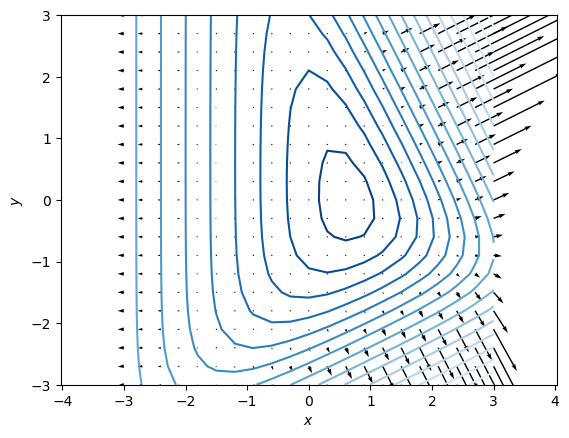

In [9]:
plot_gradients(f, grad_f)

In [10]:
# Implement the gradient descent algorithm
def minimize(x0, f, grad_func, alpha_t=0.2, maxiter=100):
    t = 0
    xt = x0
    grad_f_t = grad_func(xt)
    list_of_xts, list_of_fs = [xt], [f(xt)] # for logging
    while np.linalg.norm(grad_f_t) > 1e-4: # <-- Check for convergence
        xt = xt - alpha_t * grad_f_t # <-- Main update step
        grad_f_t = grad_func(xt) # Compute the next gradient
        
        if t >= maxiter:  # Failsafe, if the algorithm does not converge
            break
        else:
            t += 1
        list_of_xts.append(xt) # for logging
        list_of_fs.append(f(xt)) # for logging
    
    return xt, list_of_xts, list_of_fs

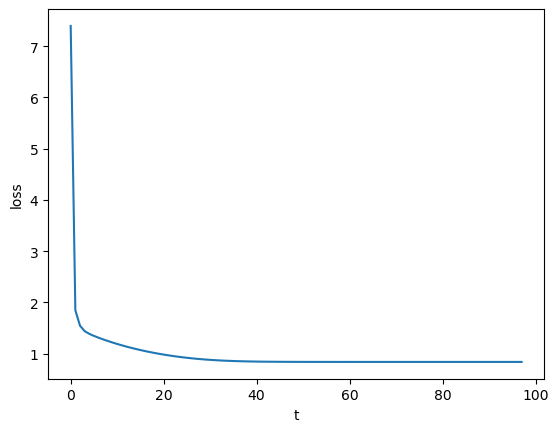

In [11]:
x0 = np.array([-2, 2])
#x0 = np.random.rand(2,2) * 4 - 2
OPTIMAL_X, list_of_xts, list_of_fs = minimize(x0,
                                              f, grad_f, 
                                              alpha_t=0.2,
                                              maxiter=1000)

fig, ax = plt.subplots()
ax.plot(list_of_fs)
ax.set_xlabel('t')
ax.set_ylabel('loss')
plt.show()

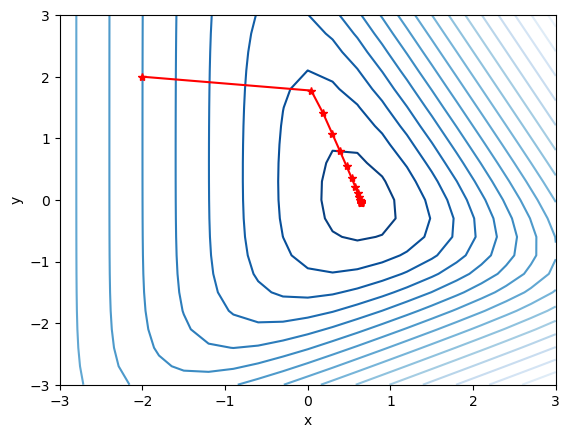

In [12]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

class Anim:
    def __init__(self, fig, ax, func):
        self.fig = fig
        self.ax = ax
        x, y = np.mgrid[-3:3:21j,
                        -3:3:21j]
        bfx = np.concatenate((x[..., None], y[..., None]), axis=-1)
        f = func(bfx)
        self.ctr = self.ax.contour(x, y, np.log(f), 20, cmap='Blues_r')
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        #self.ax.clabel(self.ctr, self.ctr.levels, inline=True, fontsize=6)
        self.list_of_xs = []
        self.list_of_ys = []
        self.line2, = self.ax.plot([], [], 'r*-')

        
    def anim_init(self):
        return (self.line2,)
        
    def update(self, xt):
        self.list_of_xs.append(xt[0])
        self.list_of_ys.append(xt[1])
        self.line2.set_data(self.list_of_xs, self.list_of_ys)
        return self.line2,
    
fig, ax = plt.subplots()        
a = Anim(fig, ax, f)
animation.FuncAnimation(fig, a.update, frames=list_of_xts[::5],
                        init_func=a.anim_init, blit=True, repeat=False)

/tmp/ipykernel_7881/2025939227.py:14: RuntimeWarning: overflow encountered in exp
  return (0.06 * np.exp(x @ coeff1)[..., None] * coeff1
/tmp/ipykernel_7881/2025939227.py:15: RuntimeWarning: overflow encountered in exp
  + 0.05 * np.exp(x @ coeff2)[..., None] * coeff2
/tmp/ipykernel_7881/2025939227.py:14: RuntimeWarning: invalid value encountered in add
  return (0.06 * np.exp(x @ coeff1)[..., None] * coeff1
/tmp/ipykernel_7881/2025939227.py:3: RuntimeWarning: overflow encountered in exp
  return (0.06 * np.exp(x @ [2, 1])
/tmp/ipykernel_7881/2025939227.py:4: RuntimeWarning: overflow encountered in exp
  + 0.05* np.exp(x @ [1, -2])


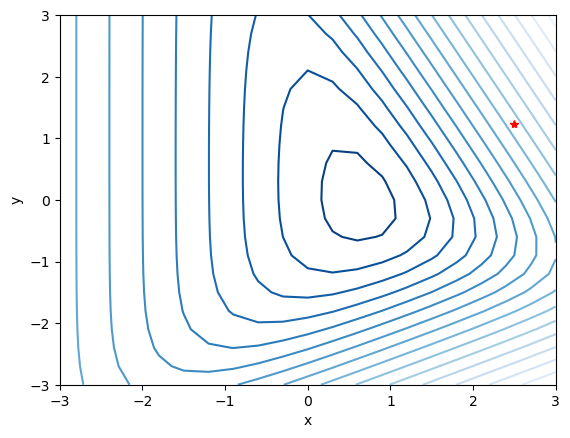

In [13]:
# The learning rate can be sensitive to the starting points. 
# Observe the behavior for different starting points
# For different starting points you might need different learning rate scheme

x0 = np.random.rand(2) * 6 - 3
OPTIMAL_X, list_of_xts, list_of_fs = minimize(x0,
                                              f, grad_f, 
                                              alpha_t=0.2,
                                              maxiter=200)
fig, ax = plt.subplots()        
a = Anim(fig, ax, f)
animation.FuncAnimation(fig, a.update, frames=list_of_xts[::10],
                        init_func=a.anim_init, blit=True, repeat=False)

## Exercise 1

Following the example above, fit a quadratic function to the function using Taylor series expansion near the points $\bfx_0 = \begin{bmatrix} -1 \\ 1\end{bmatrix}$ then visualize the contour plots of the original function and the quadratic function (50 marks),

$$f(\bfx) = x_1 \exp(-(x_1^2 + x_2^2)) $$



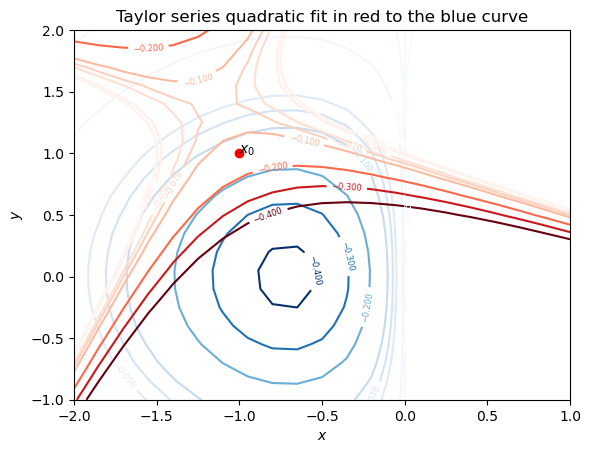

In [14]:
import numpy as np
# Define the function
def f(x): 
    #-np.square(x).sum(axis=-1) is the same as -(xTx) 
    return x[...,0] * np.exp(-np.square(x).sum(axis=-1))

# Compute its derivative, the gradient function
def grad_f(x):
    
    # Gets only the x components of the input vector
    x1 = x[...,0]
    
    # Put the terms together
    t1 = (x[...,0] * np.exp(-np.square(x).sum(axis=-1)))
    
    # Do some more dimension shifting for it to work with higher 
    # dimensions, and add in the derivative terms
    t2 = -2 * (x[...,0] * np.exp(-np.square(x).sum(axis=-1)))[...,None] * x
    
    # Add the exponential term to the x components 
    t2[...,0] += np.exp(-np.square(x).sum(axis=-1))
    
    return t2
    

def numerical_jacobian(f, x, h=1e-10):
    n = x.shape[-1]
    eye = np.eye(n)
    x_plus_dx = x + h * eye # n x n
    num_jac = (f(x_plus_dx) - f(x)) / h # limit definition of the formula # n x m
    if num_jac.ndim >= 2:
        num_jac = num_jac.swapaxes(-1, -2) # m x n
    return num_jac
    
# Compare our grad_f with numerical gradient
def check_numerical_jacobian(f, jac_f,  nD=2, **kwargs):
    x = np.random.rand(nD)
    num_jac = numerical_jacobian(f, x, **kwargs)
    return np.allclose(num_jac, jac_f(x), atol=1e-06, rtol=1e-4) # m x n

## Throw error if grad_f is wrong
assert check_numerical_jacobian(f, grad_f)

def hessian_f(x):
    #Exponential term
    exp = np.exp(-np.square(x).sum(axis=-1)) 
    # X components
    x1u_2 = 2 * x[..., 0] * exp 
    # Y components
    x2u_2 = 2 * x[..., 1] * exp 
    
    # The hessian should have double derivative dx in top left, 
    # dy in bottom right, and dxdy and dydx on the other diagonal
    
    #Einsum here does the job of np.outer() in the example function
    #Einstein summation basically supports higher dimension linear algebra ops
    H = 2 * x1u_2[..., None, None] * np.einsum('...i,...j->...ij', x, x) 
    # Put the right gradient in the right spot
    H[..., 0, 0] -= 3 * x1u_2 
    H[..., 1, 1] -= x1u_2 
    H[..., 0, 1] -= x2u_2 
    H[..., 1, 0] -= x2u_2 

    return H
    
    

## Throw error if hessian_f is wrong
assert check_numerical_jacobian(grad_f, hessian_f)


def taylor_series_quad_approx(x0, func, grad_func, hessian_func):
    def quad_func(x):
        x_min_x0 = (x-x0)[..., None] # make column vectors
        x_min_x0_T = (x-x0)[..., None, :] # make row vectors
        grad_f_x0_T = grad_func(x0)[..., None, :] # make row vectors
        return (func(x0) 
                + grad_f_x0_T @ x_min_x0
                + x_min_x0_T @ hessian_func(x0) @ x_min_x0).squeeze(axis=(-1,-2))
            
    return quad_func

def plot_contours(func, ax=None, cmap='Blues_r', levels=20, 
                  xrange=slice(-3,3,21j),
                  yrange=slice(-3,3,21j)):
    x, y = np.mgrid[xrange,
                    yrange]
    bfx = np.concatenate([x[..., None],
                          y[..., None]], axis=-1)
    f = func(bfx)
    if ax is None:
        fig, ax = plt.subplots()
    ctr = ax.contour(x, y,f, levels, cmap=cmap)
    ax.clabel(ctr, ctr.levels, inline=True, fontsize=6)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    return ax


# Fit a quadratic curve around this curve:
ax = plot_contours(f, levels=[-4e-1, -3e-1, -2e-1, -1e-1, -7e-2, -5e-2, -1e-2, -1e-3, 0, 1e-3],
              xrange=slice(-2,1,21j),
              yrange=slice(-1,2,21j))
x0 = np.array([-1, 1])
ax.plot([x0[0]], [x0[1]], 'ro')
ax.text(x0[0], x0[1], '$x_0$')
quad_func = taylor_series_quad_approx(x0, f, grad_f, hessian_f)
plot_contours(quad_func, ax=ax, cmap='Reds_r', 
              levels=[-4e-1, -3e-1, -2e-1, -1e-1, -7e-2, -5e-2, -1e-2, -1e-3, 0, 1e-3],
              xrange=slice(-2,1,21j),
              yrange=slice(-1,2,21j))
ax.set_title("Taylor series quadratic fit in red to the blue curve")
plt.show()


## Exercise 2

Following the example above, *implement your own* gradient descent algorithm that minimizes the following function (50 marks),

$$f(\bfx) = x_1 \exp(-(x_1^2 + x_2^2)) $$

Test your algorithm with the starting points of $\bfx_0 = \begin{bmatrix} -1 \\ 1\end{bmatrix}$ and $\bfx_0 = \begin{bmatrix} -1 \\ -1\end{bmatrix}$ and learning rate of $\alpha_t = 0.25$. 

In [15]:
import numpy as np

# Define the function
def f(x): 
    #-np.square(x).sum(axis=-1) is the same as -(xTx) 
    return x[...,0] * np.exp(-np.square(x).sum(axis=-1))

# Compute its derivative, the gradient function
def grad_f(x):
    
    # Gets only the x components of the input vector
    x1 = x[...,0]
    
    # Put the terms together
    t1 = (x[...,0] * np.exp(-np.square(x).sum(axis=-1)))
    
    # Do some more dimension shifting for it to work with higher 
    # dimensions, and add in the derivative terms
    t2 = -2 * (x[...,0] * np.exp(-np.square(x).sum(axis=-1)))[...,None] * x
    
    # Add the exponential term to the x components 
    t2[...,0] += np.exp(-np.square(x).sum(axis=-1))
    
    return t2


def minimize(x0, f, grad_func, alpha_t=0.25, maxiter=100):
    t = 0
    xt = x0
    grad_f_t = grad_func(xt)
    #Limit iterations to maxiter
    while t < maxiter:
        #Compute the next gradient
        grad_f_t = grad_func(xt) 
        
        #If we are at the minimum, stop
        if np.linalg.norm(grad_f_t) < 1e-4:
            break
        #Determine the next step using the learning rate and gradient
        xt = xt - alpha_t * grad_f_t
    return xt

x0 = np.array([-1, 1])

OPTIMAL_X = minimize(x0,f, grad_f, alpha_t=0.25,maxiter=200)
print(OPTIMAL_X)

[-7.07106781e-01  1.06792790e-04]


In [16]:
assert np.allclose(OPTIMAL_X, [-7.07e-01,  1.06e-04], atol=1e-3, rtol=1e-2)

In [17]:
x0 = np.array([-1, -1])
OPTIMAL_X = minimize(x0,f, grad_f, alpha_t=0.25,maxiter=200)
print(OPTIMAL_X)

[-7.07106781e-01 -1.06792790e-04]


In [18]:
assert np.allclose(OPTIMAL_X, [-7.07e-01,  1.06e-04], atol=1e-3, rtol=1e-2)